<a href="https://colab.research.google.com/github/jyns417/Datathon/blob/main/Data_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, re
import random, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path='/content/athlete_events.csv'
data=pd.read_csv(path)

In [ ]:
data.head()
data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
data.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [ ]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
#### 불필요한 column 제거한 new data: Team, Games, Event 제거
ndata=data.drop('Team', axis=1)
ndata=ndata.drop('Games', axis=1)
ndata=ndata.drop('Event', axis=1)
ndata.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,NaN


In [ ]:
#### 결측치 처리: Age, Weight, Height 의 결측치 마다 mean 값으로 결측치 처리 (남/여를 나눠서)
ndata.groupby('Sex')['Age'].mean()
ndata.groupby('Sex')['Weight'].mean()
ndata.groupby('Sex')['Height'].mean()

ndata['Age'].fillna(ndata.groupby('Sex')['Age'].transform(lambda x:x.fillna(x.mean())))
ndata['Weight'].fillna(ndata.groupby('Sex')['Weight'].transform(lambda x:x.fillna(x.mean())))
ndata['Height'].fillna(ndata.groupby('Sex')['Height'].transform(lambda x:x.fillna(x.mean())))

#ndata.groupby('Sex')['Age'].apply(lambda x: x.fillna(x.mean()))
#ndata.groupby('Sex')['Weight'].apply(lambda x: x.fillna(x.mean()))
#ndata.groupby('Sex')['Height'].apply(lambda x: x.fillna(x.mean()))


,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
NOC,0
Year,0
Season,0
City,0


In [ ]:
ndata.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season',
       'City', 'Sport', 'Medal'],
      dtype='object')

In [ ]:
ndata['Medal'].unique() # nan, 'Gold', 'Bronze', 'Silver'
ndata['Year'].unique() # 1896 ~ 1992
len(ndata['NOC'].unique()) # 230
len(ndata['Sport'].unique()) # 66개
len(ndata['City'].unique()) # 42

#ndata.isna().sum()

Sex        
F    4         185.0
     5         185.0
     6         185.0
     7         185.0
     8         185.0
               ...  
M    271111    179.0
     271112    176.0
     271113    176.0
     271114    185.0
     271115    185.0
Name: Height, Length: 271116, dtype: float64

In [ ]:
ndata.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,NaN


TypeError: 'value' must be an instance of str or bytes, not a float

<Figure size 640x480 with 0 Axes>

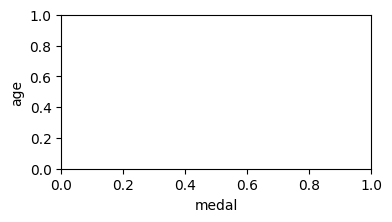

In [ ]:
#### DATA VISUALIZATION ####

fig=plt.figure()
fig=plt.figure(figsize=(4,2))

#1. medal 별로 age 의 분포
medal=ndata['Medal']
age=ndata['Age']

plt.xlabel('medal', fontsize=10)
plt.ylabel('age', fontsize=10)
plt.scatter(medal, age, alpha=0.5, marker='+')
plt.show()